In [1357]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [1358]:
data = pd.read_csv('forestfires.csv')

In [1359]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [1360]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [1361]:
data['month'].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [1362]:
data['day'].unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

day
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: count, dtype: int64


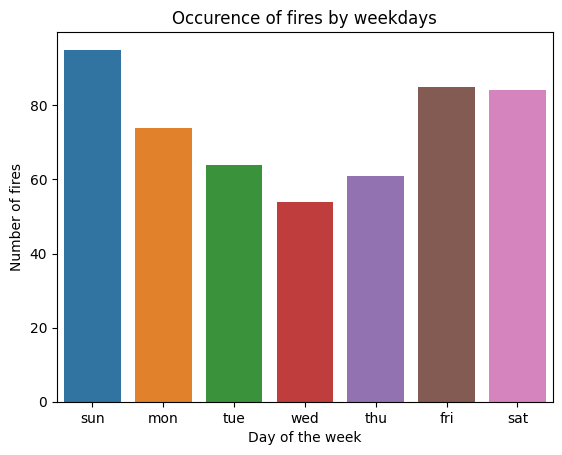

In [1363]:
# Count the occurrences of each weekday
day_counts = data['day'].value_counts()
print(day_counts)
# Define the order of weekdays for plotting
weekday_order = ['sun', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat']
# Create the bar plot
chart = sns.barplot(x=day_counts.index, y=day_counts, order=weekday_order)
chart.set_xlabel('Day of the week')
chart.set_ylabel('Number of fires')
chart.set_title('Occurence of fires by weekdays')
# Display the plot
plt.show()

In [1364]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


<Axes: title={'center': 'Fire on land with months'}, xlabel='X', ylabel='Y'>

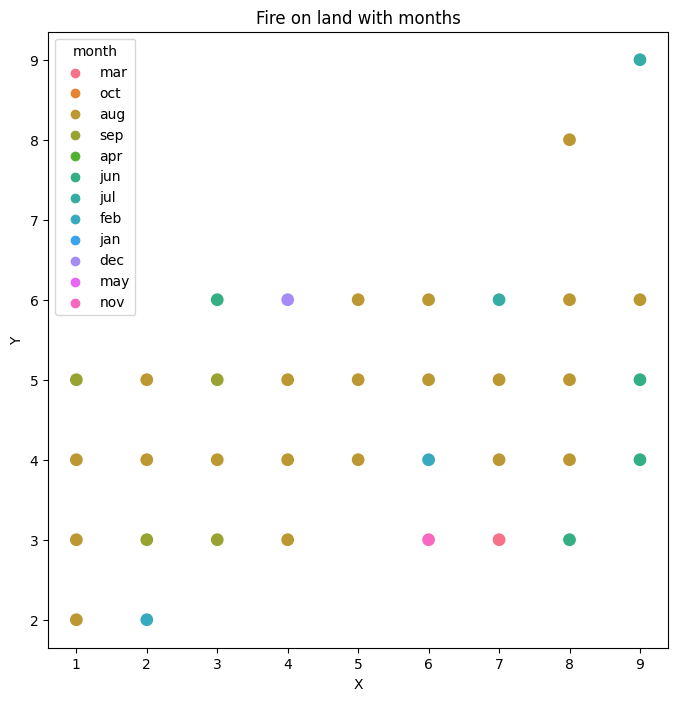

In [1365]:
#scatter plot on x y coordinator color based on months
plt.figure(figsize=(8,8))
plt.title('Fire on land with months')
sns.scatterplot(x=data['X'], y=data['Y'], hue=data['month'], s=100)

<Axes: title={'center': 'Scatter plot with temp and wind'}, xlabel='temp', ylabel='wind'>

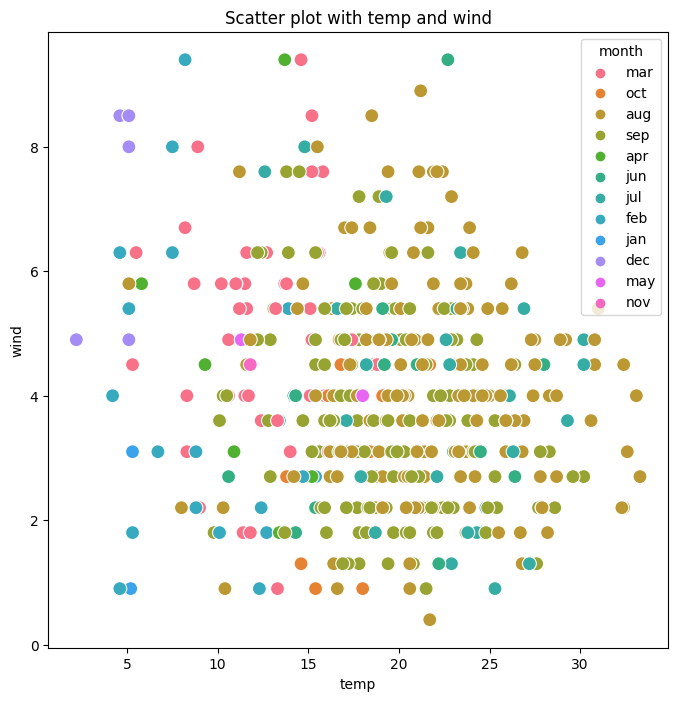

In [1366]:
#scatter plot on temp wind coordinator color based on months
plt.figure(figsize=(8,8))
plt.title('Scatter plot with temp and wind')
sns.scatterplot(x=data['temp'], y=data['wind'], hue=data['month'], s=100)

In [1367]:
data.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7),inplace=True)
data.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)

In [1368]:
data.loc[data['area'] == 0, 'Fire_Scale'] = 'No Fire'
data.loc[(data['area'] > 0) & (data['area'] <= 10), 'Fire_Scale'] = 'Small Fire'
data.loc[data['area'] > 10, 'Fire_Scale'] = 'Large Fire'

In [1369]:
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,Fire_Scale
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,No Fire
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,No Fire
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,No Fire
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,No Fire
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,No Fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,Small Fire
513,2,4,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,Large Fire
514,7,4,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,Large Fire
515,1,4,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,No Fire


In [1370]:
numeric_columns = data.select_dtypes(include=[float, int]).columns
# Calculate the correlation matrix
corr = data[numeric_columns].corr()
print(corr)

              X         Y     month       day      FFMC       DMC        DC   
X      1.000000  0.539548 -0.065003 -0.024922 -0.021039 -0.048384 -0.085916  \
Y      0.539548  1.000000 -0.066292 -0.005453 -0.046308  0.007782 -0.101178   
month -0.065003 -0.066292  1.000000 -0.050837  0.291477  0.466645  0.868698   
day   -0.024922 -0.005453 -0.050837  1.000000 -0.041068  0.062870  0.000105   
FFMC  -0.021039 -0.046308  0.291477 -0.041068  1.000000  0.382619  0.330512   
DMC   -0.048384  0.007782  0.466645  0.062870  0.382619  1.000000  0.682192   
DC    -0.085916 -0.101178  0.868698  0.000105  0.330512  0.682192  1.000000   
ISI    0.006210 -0.024488  0.186597  0.032909  0.531805  0.305128  0.229154   
temp  -0.051258 -0.024103  0.368842  0.052190  0.431532  0.469594  0.496208   
RH     0.085223  0.062221 -0.095280  0.092151 -0.300995  0.073795 -0.039192   
wind   0.018798 -0.020341 -0.086368  0.032478 -0.028485 -0.105342 -0.203466   
rain   0.065387  0.033234  0.013438 -0.048340  0.056

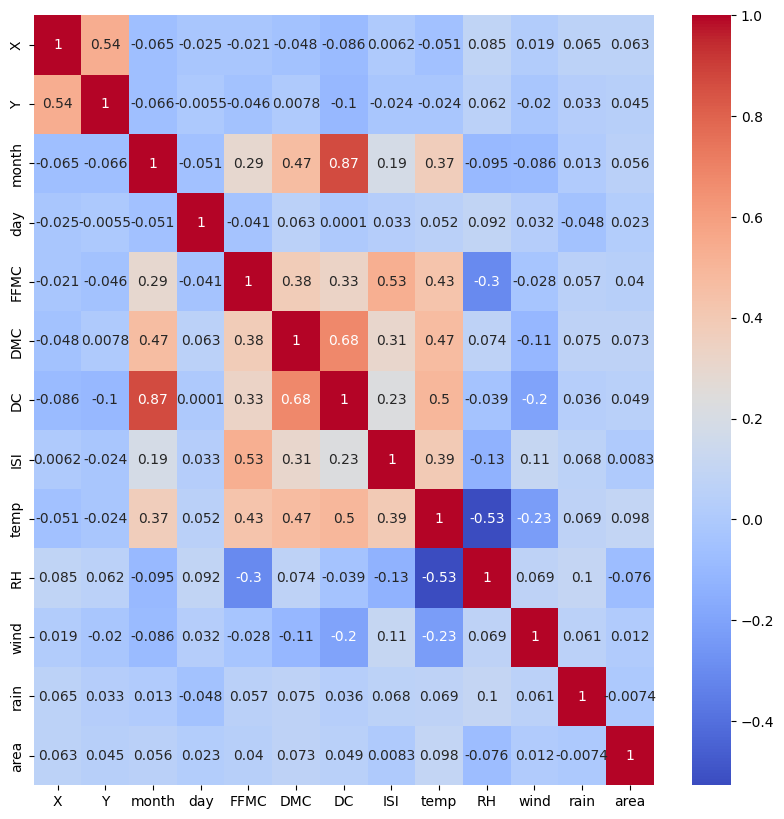

In [1371]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cbar=True, cmap = 'coolwarm')
plt.show()

In [1372]:
data.groupby(['month', 'Fire_Scale'])['Fire_Scale'].count()

month  Fire_Scale
1      No Fire        2
2      Large Fire     3
       No Fire       10
       Small Fire     7
3      Large Fire     7
       No Fire       35
       Small Fire    12
4      Large Fire     2
       No Fire        5
       Small Fire     2
5      Large Fire     1
       No Fire        1
6      Large Fire     2
       No Fire        9
       Small Fire     6
7      Large Fire     3
       No Fire       14
       Small Fire    15
8      Large Fire    30
       No Fire       85
       Small Fire    69
9      Large Fire    39
       No Fire       75
       Small Fire    58
10     Large Fire     3
       No Fire       10
       Small Fire     2
11     No Fire        1
12     Large Fire     5
       Small Fire     4
Name: Fire_Scale, dtype: int64

In [1373]:
d = data[data['area']>0].copy()

In [1374]:
print(d.shape)
for m in d['month'].unique():
    if((m!='aug')&(m!='sep')):
        temp = d[d['month']==m].sample(300, replace=True)
        d = pd.concat([d, temp], axis=0)

print(d.shape)

(270, 14)
(3270, 14)


<BarContainer object of 10 artists>

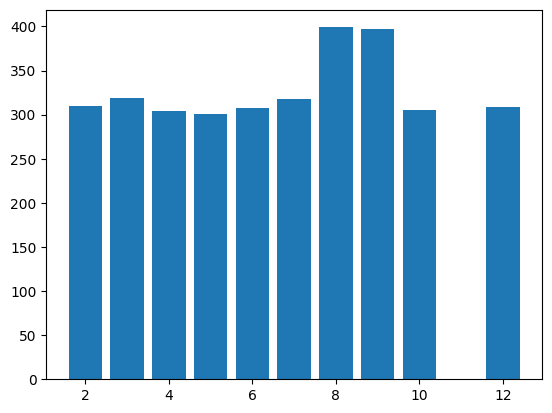

In [1375]:
t = d.groupby(['month'])['month'].count()
plt.bar(t.index, t)

In [1376]:
X = d.drop(['area', 'Fire_Scale'], axis=1)
y = d['area']

In [1377]:
X = pd.get_dummies(X, columns=['month', 'day'])
X.head(2)

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_9,month_10,month_12,day_1,day_2,day_3,day_4,day_5,day_6,day_7
138,9,9,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,...,False,False,False,False,True,False,False,False,False,False
139,1,4,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,...,True,False,False,False,True,False,False,False,False,False


In [1378]:
x_cols_for_scaling = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

In [1379]:
x_train, x_test, y_train, y_test = train_test_split(X, np.log(y+1), shuffle=True)
print(x_train.shape, x_test.shape)

(2452, 27) (818, 27)


In [1380]:
x_train_orig = x_train.loc[:, x_cols_for_scaling]
x_train_cat = x_train.drop(x_cols_for_scaling, axis=1)

x_test_orig = x_test.loc[:, x_train_orig.columns]
x_test_cat = x_test.loc[:, x_train_cat.columns]

In [1381]:
scl= StandardScaler()
scl.fit(x_train_orig)

x_train_orig = scl.transform(x_train_orig)
x_test_orig = scl.transform(x_test_orig)

# Combine
x_train = np.concatenate([x_train_orig, np.array(x_train_cat)], axis=1)
x_test = np.concatenate([x_test_orig, np.array(x_test_cat)], axis=1)

print(x_train.shape, x_test.shape)

(2452, 27) (818, 27)


mse:  0.7924
mae:  0.6258
r2:  0.3841


Text(0, 0.5, 'y_pred')

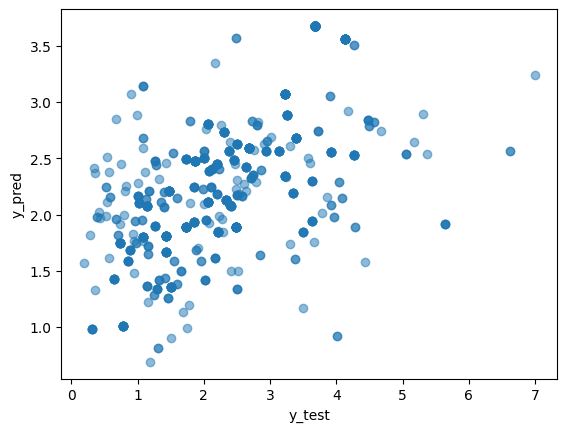

In [1382]:
reg =LinearRegression()
reg.fit(x_train, y_train)

# Predict
y_pred = reg.predict(x_test)

# Score
mse = mean_squared_error(y_test, y_pred)
print('mse: ', np.round(mse, 4))

mae = mean_absolute_error(y_test, y_pred)
print('mae: ', np.round(mae, 4))

r2 = r2_score(y_test, y_pred)
print('r2: ', np.round(r2, 4))


# Plot
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')

mse:  0.568
mae:  0.4063
r2:  0.5585


Text(0, 0.5, 'y_pred')

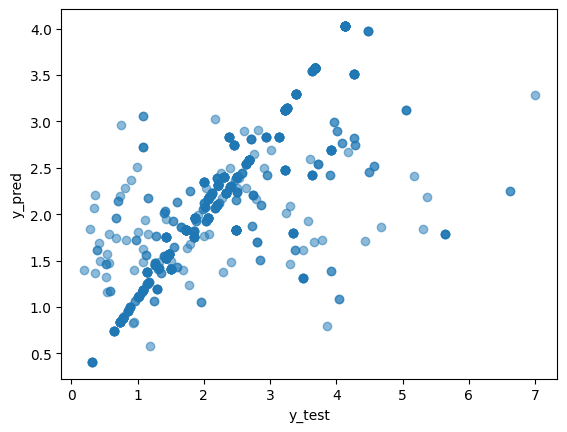

In [1383]:
from sklearn.svm import SVR

reg = SVR(C=1, kernel='rbf', gamma='auto', max_iter=-1, cache_size=1000)
reg.fit(x_train, y_train)

# Predict
y_pred = reg.predict(x_test)

# Score
mse = mean_squared_error(y_test, y_pred)
print('mse: ', np.round(mse, 4))

mae = mean_absolute_error(y_test, y_pred)
print('mae: ', np.round(mae, 4))

r2 = r2_score(y_test, y_pred)
print('r2: ', np.round(r2, 4))

# Plot
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [1384]:
dfc = data.copy()

In [1385]:
dfc.Fire_Scale.value_counts()

Fire_Scale
No Fire       247
Small Fire    175
Large Fire     95
Name: count, dtype: int64

In [1386]:
print(dfc.shape)
for m in dfc['month'].unique():
    if((m!='aug')&(m!='sep')):
        temp = dfc[dfc['month']==m].sample(300, replace=True)
        dfc = pd.concat([dfc, temp], axis=0)

print(dfc.shape)

(517, 14)
(4117, 14)


In [1387]:
Xc = dfc.drop(['area', 'Fire_Scale'], axis=1)
yc = dfc['Fire_Scale']

In [1388]:
Xc = pd.get_dummies(Xc, columns=['month', 'day'])
Xc.head(2)

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_10,month_11,month_12,day_1,day_2,day_3,day_4,day_5,day_6,day_7
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,False,False,False,False,False,False,False,True,False,False
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,True,False,False,False,True,False,False,False,False,False


In [1389]:
x_cols_for_scaling = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

In [1390]:
print(Xc.shape)
Xc = Xc[Xc.columns[(Xc.var(axis=0)>0).values]]
print(Xc.shape)

(4117, 29)
(4117, 29)


In [1391]:
# Collinearity
print(Xc.shape)
x_corr = Xc.corr()**2

x_upper = x_corr.where(np.triu(np.ones(x_corr.shape), k=1).astype(np.bool))

# r2>0.7
drop_col = [col for col in x_upper.columns if any(x_upper[col] > 0.70)]

Xc = Xc.drop(drop_col, axis=1)
print(Xc.shape)

(4117, 29)
(4117, 29)


C:\Users\DHAKSHESH\AppData\Local\Temp\ipykernel_29588\3602340035.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_upper = x_corr.where(np.triu(np.ones(x_corr.shape), k=1).astype(np.bool))


In [1392]:
x_train, x_test, y_train, y_test = train_test_split(Xc, yc, 
                                                    shuffle=True, stratify=yc)
print(x_train.shape, x_test.shape)


(3087, 29) (1030, 29)


In [1393]:
x_train_orig = x_train.loc[:, x_cols_for_scaling]
x_train_cat = x_train.drop(x_cols_for_scaling, axis=1)

x_test_orig = x_test.loc[:, x_train_orig.columns]
x_test_cat = x_test.loc[:, x_train_cat.columns]

In [1394]:
scl=StandardScaler()
scl.fit(x_train_orig)

x_train_orig = scl.transform(x_train_orig)
x_test_orig = scl.transform(x_test_orig)

# Combine
x_train = np.concatenate([x_train_orig, np.array(x_train_cat)], axis=1)
x_test = np.concatenate([x_test_orig, np.array(x_test_cat)], axis=1)

print(x_train.shape, x_test.shape)

(3087, 29) (1030, 29)


In [1395]:
# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
} 

from sklearn.metrics import accuracy_score
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print(f'{name}:\nAccuracy: {acc:.4f}')

Logistic Regression:
Accuracy: 0.6650
Naive Bayes:
Accuracy: 0.4515
Support Vector Machine:
Accuracy: 0.8330
K-Nearest Neighbors:
Accuracy: 0.8961
Decision Tree:
Accuracy: 0.9544
Random Forest:
Accuracy: 0.9544
Bagging:
Accuracy: 0.9534
AdaBoost:
Accuracy: 0.6087
Gradient Boosting:
Accuracy: 0.8893
Extra Trees:
Accuracy: 0.9524


In [1396]:
model =BaggingClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the z-score of the input data
input_data_mean = np.mean(x_train, axis=0)
input_data_std = np.std(x_train, axis=0)
X_train_zscore = (x_train - input_data_mean) / input_data_std

# Print the z-score
print("Z-score of input data:")
print(X_train_zscore)

Accuracy: 0.9524271844660194
Z-score of input data:
[[ 0.51345884  0.57739254 -0.01566571 ... -0.42005734  2.05938986
  -0.48710835]
 [ 1.0031244   0.57739254 -0.24177933 ... -0.42005734 -0.48558072
   2.05293133]
 [ 0.51345884 -1.10254222 -0.41136455 ... -0.42005734 -0.48558072
  -0.48710835]
 ...
 [-0.46587229 -1.10254222  0.30230657 ...  2.38062736 -0.48558072
  -0.48710835]
 [-0.95553786 -0.26257484 -0.10045832 ... -0.42005734  2.05938986
  -0.48710835]
 [ 0.51345884  0.57739254 -0.01566571 ... -0.42005734  2.05938986
  -0.48710835]]


In [1397]:
# User input form and prediction
month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
day_mapping = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7}

# Get user input
month = input("Enter the month: ")
day = input("Enter the day: ")
FFMC = float(input("Enter the value for FFMC: "))
DMC = float(input("Enter the value for DMC: "))
DC = float(input("Enter the value for DC: "))
ISI = float(input("Enter the value for ISI: "))
temp = float(input("Enter the value for temp: "))
Rh = int(input("Enter the value for RH: "))
wind = float(input("Enter the value for Wind: "))
rain = float(input("Enter the value for rainfall: "))

# Create a new dataframe with user input
user_input_df = pd.DataFrame({'month': [month], 'day': [day], 'FFMC': [FFMC], 'DMC': [DMC], 'DC': [DC], 'ISI': [ISI], 'temp': [temp], 'RH': [Rh], 'wind': [wind], 'rain': [rain]})

# Encode categorical features in user input
user_input_df['month'] = user_input_df['month'].map(month_mapping)
user_input_df['day'] = user_input_df['day'].map(day_mapping)

# Preprocess the user input
user_input_df = pd.get_dummies(user_input_df, columns=['month', 'day'])
user_input_df = user_input_df.reindex(columns=Xc.columns, fill_value=0)

# Scale the numerical features in user input
user_input_orig = user_input_df[x_cols_for_scaling]
user_input_cat = user_input_df.drop(x_cols_for_scaling, axis=1)

user_input_orig = scl.transform(user_input_orig)

# Combine the scaled and categorical features
user_input = np.concatenate([user_input_orig, np.array(user_input_cat)], axis=1)

prediction = model.predict(user_input)
print("Predicted Fire_Scale:", prediction)

Predicted Fire_Scale: ['Small Fire']
